In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data = pd.read_csv('titanic/train.csv')

In [10]:
len(data)

891

In [57]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

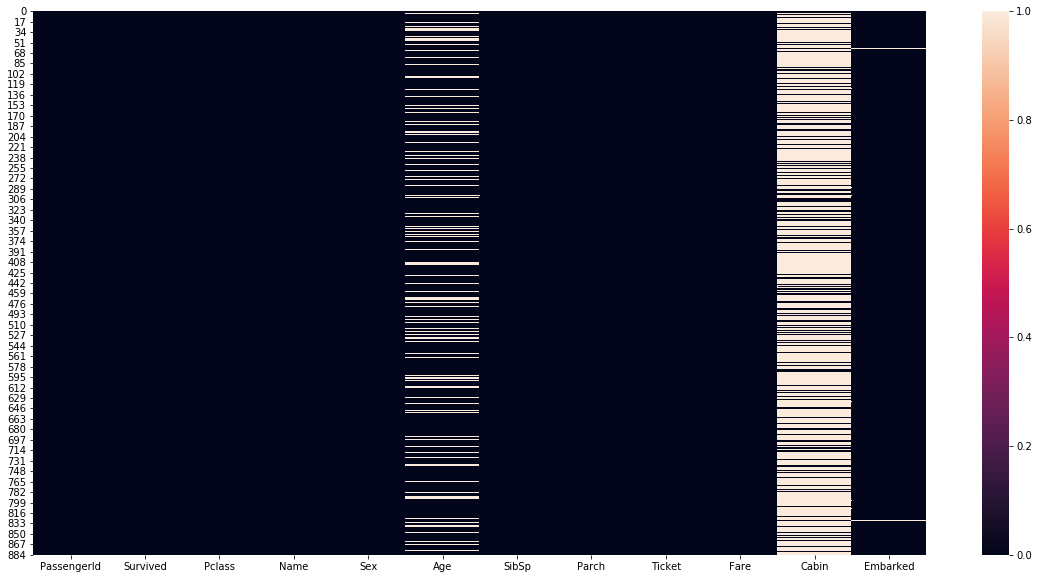

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull())

In [35]:
data = data.drop('Cabin', axis=1)

In [36]:
data = data.replace({'male':0, 'female':1})

In [37]:
for i in range(0, len(data)):
    data.loc[i, 'Name'] = len(data.loc[i, 'Name'])

In [38]:
for i in range(0, len(data)):
    data.loc[i, 'Ticket'] = len(data.loc[i, 'Ticket'])

In [39]:
data = data.replace({'S':0, 'Q':1, 'C':2})

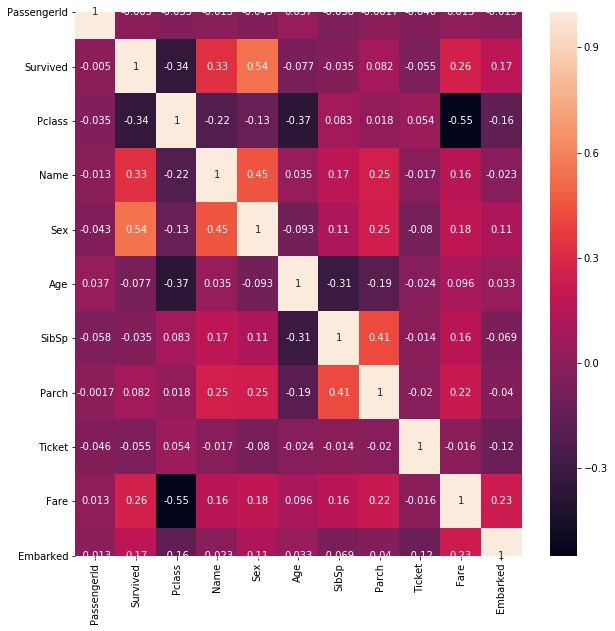

In [40]:
co = data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(co, annot=True)

In [43]:
data

PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0              1         0       3    23    0  22.0      1      0       9   
1              2         1       1    51    1  38.0      1      0       8   
2              3         1       3    22    1  26.0      0      0      16   
3              4         1       1    44    1  35.0      1      0       6   
4              5         0       3    24    0  35.0      0      0       6   
..           ...       ...     ...   ...  ...   ...    ...    ...     ...   
886          887         0       2    21    0  27.0      0      0       6   
887          888         1       1    28    1  19.0      0      0       6   
888          889         0       3    40    1   NaN      1      2      10   
889          890         1       1    21    0  26.0      0      0       6   
890          891         0       3    19    0  32.0      0      0       6   

        Fare  Embarked  
0     7.2500       0.0  
1    71.2833       2.0  
2     7.9250       0.0  
3    53.1000       0.0  
4     8.0500       0.0  
..       ...       ...  
886  13.0000       0.0  
887  30.0000       0.0  
888  23.4500       0.0  
889  30.0000       2.0  
890   7.7500       1.0  

[891 rows x 11 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55718c9550>,
      dtype=object)

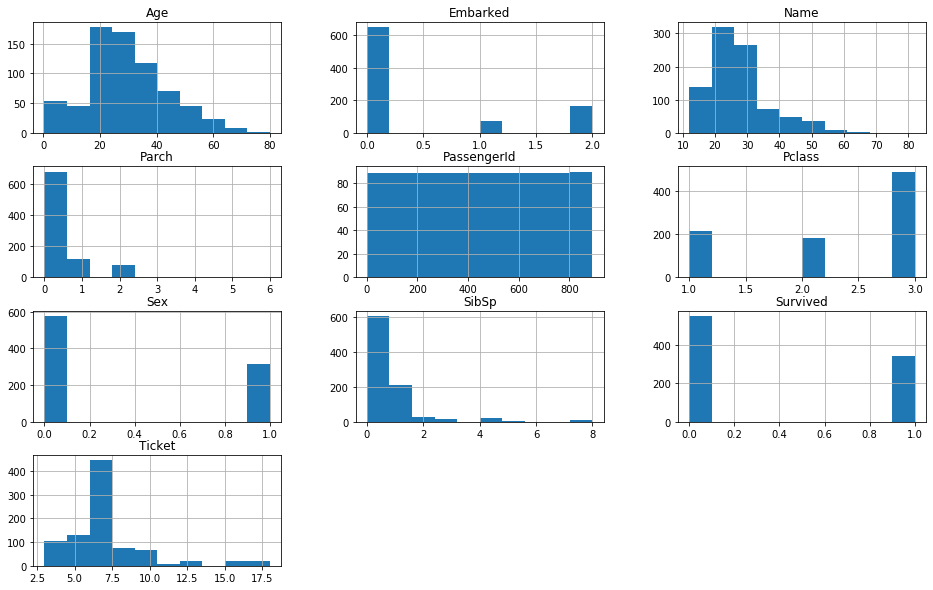

In [51]:
data.hist(figsize=(16,10))

In [41]:
data = data.drop(['Fare', 'Embarked'], axis=1)

In [9]:
data

PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket
0              1         0       3    23    0  22.0      1      0       9
1              2         1       1    51    1  38.0      1      0       8
2              3         1       3    22    1  26.0      0      0      16
3              4         1       1    44    1  35.0      1      0       6
4              5         0       3    24    0  35.0      0      0       6
..           ...       ...     ...   ...  ...   ...    ...    ...     ...
886          887         0       2    21    0  27.0      0      0       6
887          888         1       1    28    1  19.0      0      0       6
888          889         0       3    40    1   NaN      1      2      10
889          890         1       1    21    0  26.0      0      0       6
890          891         0       3    19    0  32.0      0      0       6

[891 rows x 9 columns]

Text(0.5, 0, 'Age')

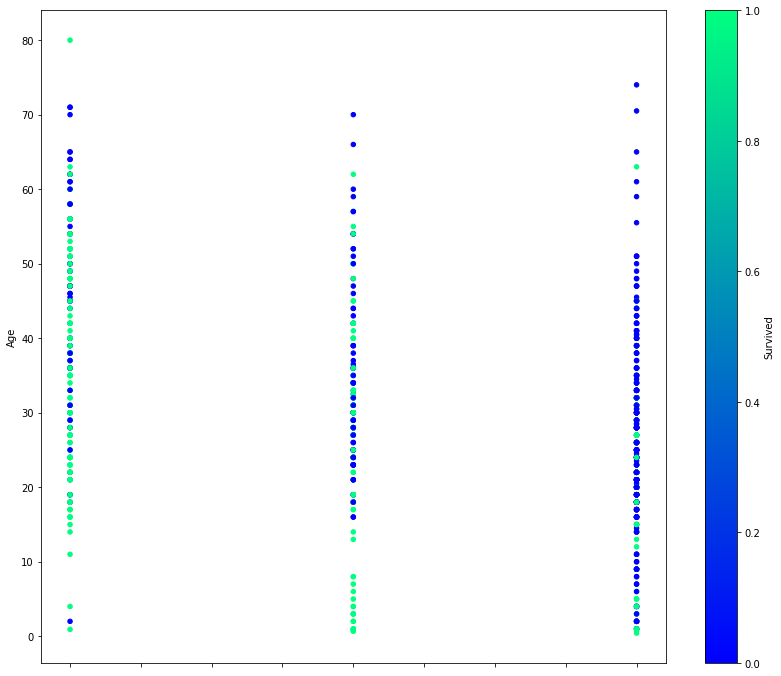

In [10]:
data[['Survived', 'Pclass', 'Age']].plot(kind='scatter', x='Pclass', y='Age', c='Survived', colormap='winter', figsize=(14,12))
plt.xlabel("Age")

In [11]:
data[data['Age'].isnull()]

PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket
5              6         0       3    16    0  NaN      0      0       6
17            18         1       2    28    0  NaN      0      0       6
19            20         1       3    23    1  NaN      0      0       4
26            27         0       3    23    0  NaN      0      0       4
28            29         1       3    29    1  NaN      0      0       6
..           ...       ...     ...   ...  ...  ...    ...    ...     ...
859          860         0       3    16    0  NaN      0      0       4
863          864         0       3    33    1  NaN      8      2       8
868          869         0       3    27    0  NaN      0      0       6
878          879         0       3    18    0  NaN      0      0       6
888          889         0       3    40    1  NaN      1      2      10

[177 rows x 9 columns]

In [42]:
data_tr = data.drop('PassengerId', axis=1)

In [43]:
data_reduce = data_tr.dropna()

In [44]:
data_tr.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
dtype: int64

In [45]:
data_reduce.mean()

Survived     0.406162
Pclass       2.236695
Name        27.693277
Sex          0.365546
Age         29.699118
SibSp        0.512605
Parch        0.431373
Ticket       6.841737
dtype: float64

In [47]:
data_tr.mean()

Survived     0.383838
Pclass       2.308642
Name        26.965208
Sex          0.352413
Age         29.699118
SibSp        0.523008
Parch        0.381594
Ticket       6.750842
dtype: float64

In [48]:
MEAN_VALUES = data_tr.mean()

In [17]:
avgfull = np.array(data_tr.mean())
(np.array(data_reduce.mean()) - avgfull) / avgfull * 100.0

array([ 5.81601061, -3.11643374,  2.70003365,  3.7266499 ,  0.        ,
       -1.98903596, 13.0449827 ,  1.34642386])

In [19]:
data.to_csv('dataset/train_id.csv')

In [23]:
data_tr = data_tr.fillna(data_tr['Age'].mean())

In [24]:
data_tr.to_csv('dataset/train.csv')

In [25]:
data_reduce.to_csv('dataset/train_red.csv')

# Test dataset

In [49]:
data = data = pd.read_csv('titanic/test.csv')

In [50]:
data = data.drop(['Fare', 'Embarked', 'Cabin'], axis=1)

In [51]:
data = data.replace({'male':0, 'female':1})
for i in range(0, len(data)):
    data.loc[i, 'Name'] = len(data.loc[i, 'Name'])
    data.loc[i, 'Ticket'] = len(data.loc[i, 'Ticket'])

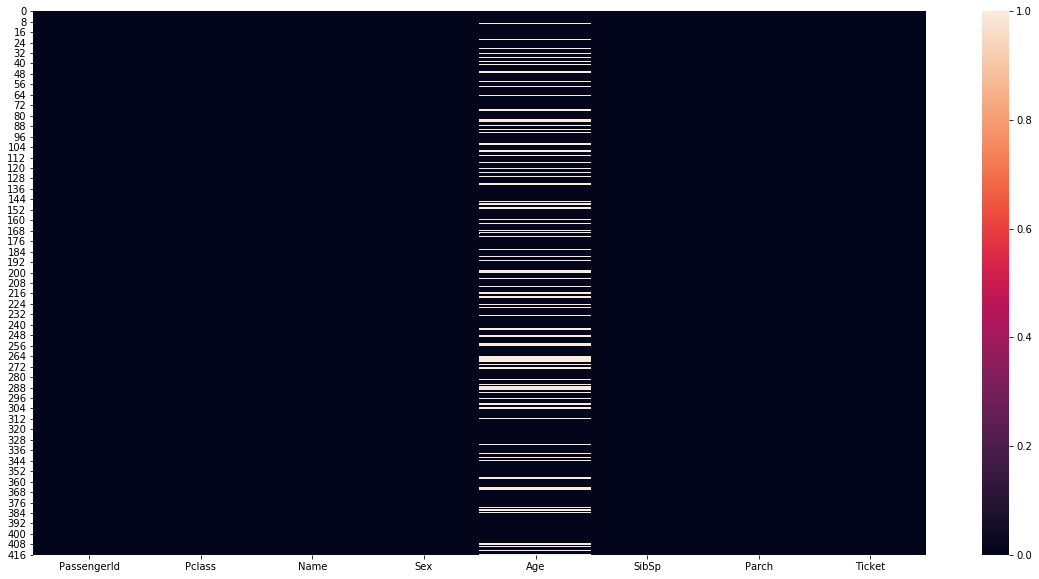

In [52]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull())

In [25]:
data_tr = data.drop('PassengerId', axis=1)

In [53]:
data_tr = data_tr.fillna(MEAN_VALUES['Age'])
data_reduced = data_tr.dropna()

In [54]:
data_tr.to_csv('dataset/test.csv')
data_reduced.to_csv('dataset/test_red.csv')
data.to_csv('dataset/test_id.csv')

# Output

In [2]:
data = pd.read_csv('titanic/test.csv')

In [3]:
data = data.drop(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)

In [4]:
data['Survived'] = [0] * len(data)

In [5]:
data

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         0
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [8]:
data.to_csv('output.csv', index=False)

In [62]:
pd.DataFrame(MEAN_VALUES).transpose().to_csv('meta_mean.csv', index=False)